# Test

### Import libraries

In [13]:
!pip install pandas
!pip install matplotlib


# Load data

In [7]:
import pandas as pd

# 1. Load the data
# Replace 'your_file.csv' with the actual name of the file you downloaded
df = pd.read_csv('scanner_data.csv')

# Remove rows where any cell value is NULL/NaN
df = df.dropna()

# 2. Show the first 5 rows to see what's inside
print(df.head())

# 3. Get a quick summary of the columns and data types
print(df.info())

   Unnamed: 0        Date  Customer_ID  Transaction_ID SKU_Category    SKU  \
0           1  02/01/2016         2547               1          X52  0EM7L   
1           2  02/01/2016          822               2          2ML  68BRQ   
2           3  02/01/2016         3686               3          0H2  CZUZX   
3           4  02/01/2016         3719               4          0H2  549KK   
4           5  02/01/2016         9200               5          0H2  K8EHH   

   Quantity  Sales_Amount  
0       1.0          3.13  
1       1.0          5.46  
2       1.0          6.35  
3       1.0          5.59  
4       1.0          6.88  
<class 'pandas.DataFrame'>
RangeIndex: 131706 entries, 0 to 131705
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      131706 non-null  int64  
 1   Date            131706 non-null  str    
 2   Customer_ID     131706 non-null  int64  
 3   Transaction_ID  131706 non-nu

In [8]:
import pandas as pd

# Load data (use read_excel for .xlsx or read_csv for .csv)
# df = pd.read_excel('your_file.xlsx')  # for Excel
df = pd.read_csv('scanner_data.csv')
df = df.dropna()  # Remove rows with any NULL/NaN

# Parse Date column (format: DD/MM/YYYY)
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Pick the date you want the sum for (e.g. 2016-01-02)
target_date = '2016-01-02'
mask = df['Date'] == target_date
total_sales = df.loc[mask, 'Sales_Amount'].sum()

print(f"Total Sales_Amount for {target_date}: {total_sales}")

Total Sales_Amount for 2016-01-02: 1929.5500000000002


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('scanner_data.csv')
df = df.dropna()  # Remove rows with any NULL/NaN
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Filter for SKU 0EM7L
sku = '0EM7L'
df_sku = df[df['SKU'] == sku].copy()

# Add Year-Month for grouping
df_sku['YearMonth'] = df_sku['Date'].dt.to_period('M')

# Aggregate sales by month: sum of Sales_Amount, count of transactions
monthly = df_sku.groupby('YearMonth').agg(
    Sales_Amount=('Sales_Amount', 'sum'),
    Transactions=('Transaction_ID', 'nunique'),
    Quantity=('Quantity', 'sum')
).reset_index()
monthly['YearMonth'] = monthly['YearMonth'].dt.to_timestamp()

# Display monthly performance
print(f"Sales performance over time for SKU {sku}\n")
print(monthly.to_string(index=False))
print(f"\nTotal Sales_Amount (all months): {monthly['Sales_Amount'].sum():.2f}")

Matplotlib is building the font cache; this may take a moment.


Sales performance over time for SKU 0EM7L

 YearMonth  Sales_Amount  Transactions  Quantity
2016-01-01         15.65             5       5.0
2016-02-01          3.13             1       1.0
2016-03-01          6.47             2       2.0
2016-04-01          3.13             1       1.0
2016-05-01          9.81             3       3.0
2016-06-01          3.13             1       1.0
2016-07-01          6.68             2       2.0
2016-08-01         10.02             3       3.0
2016-09-01          6.68             2       2.0
2016-10-01         16.70             4       5.0
2016-11-01          6.68             2       2.0
2016-12-01          3.34             1       1.0

Total Sales_Amount (all months): 91.42


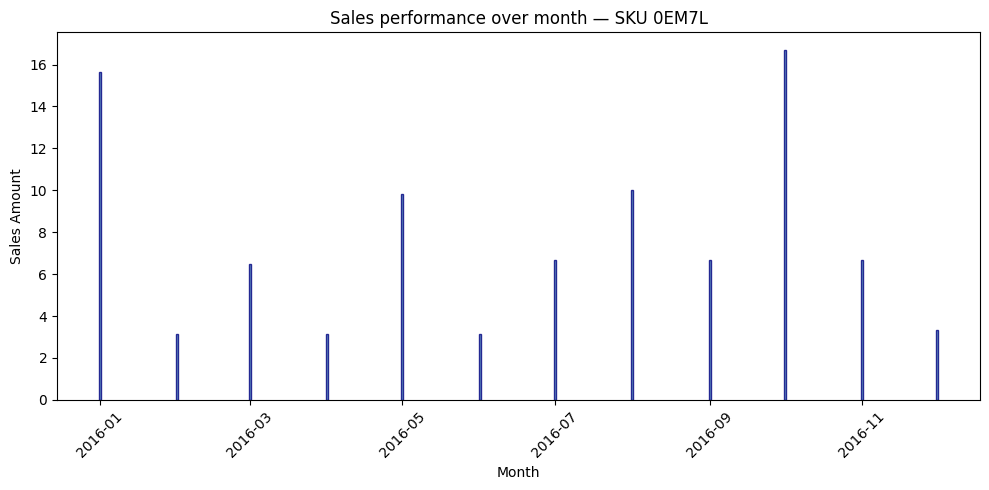

In [10]:
# Plot: Sales_Amount by month for SKU 0EM7L
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(monthly['YearMonth'], monthly['Sales_Amount'], color='steelblue', edgecolor='navy', alpha=0.8)
ax.set_xlabel('Month')
ax.set_ylabel('Sales Amount')
ax.set_title(f'Sales performance over month — SKU {sku}')
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()